# Introduction to Linear Regression 

### Motivation

Why are we learning linear regression? 
- widely used
- runs fast
- easy to use (not a lot of tuning required)
- highly interpretable
- basis for many other methods

## Libraries

We will use statsmodels for teaching purposes since it has some nice characteristics for linear modeling. However, we recommend that you spend most of your energy on scikit-learn since it provides significantly more useful functionality for machine learning in general.

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# this allows plots to appear directly in the notebook
%matplotlib inline

### Example: Advertising Data 

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [3]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the features?

TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
Radio: advertising dollars spent on Radio
Newspaper: advertising dollars spent on Newspaper

What is the target variable?

Sales: sales of a single product in a given market (in thousands)

In [4]:
# print the shape of the Dataset 
print('Number of rows: ',data.shape[0])
print('Number of columns: ',data.shape[1])

Number of rows:  200
Number of columns:  4


There are 200 observations, and thus 200 markets in the dataset.

In [27]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

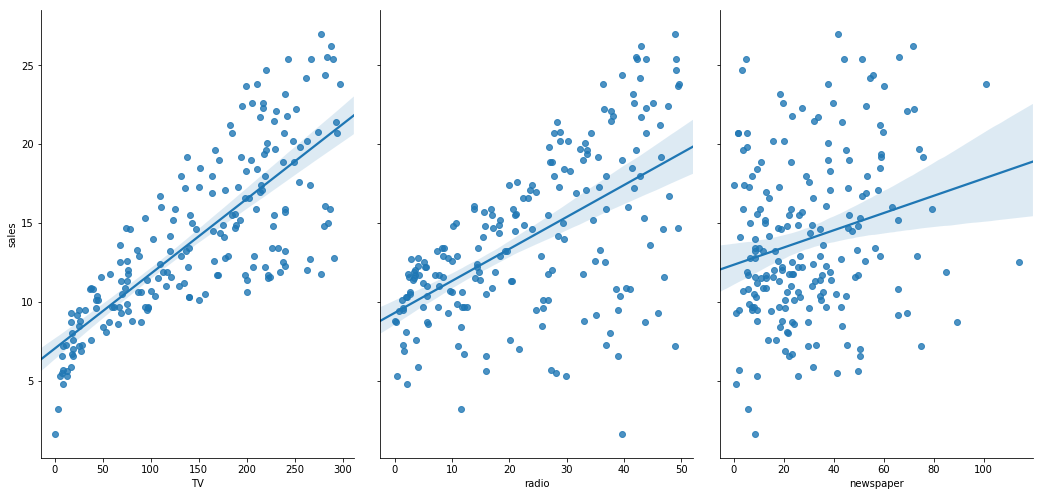

In [32]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', height = 7,aspect=0.7, kind='reg')

## Questions about the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:

1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

## Simple Linear Regression

Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable"). It takes the following form:

y = β0 + β1x

What does each term represent?

- y is the target
- x is the feature
- β0 is the intercept
- β1 is the coefficient for x

Together, β0 and β1 are called the model coefficients. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

Let's use Statsmodels to estimate the model coefficients for the advertising data:

In [33]:
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='sales ~ TV', data=data).fit()

# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

## Interpreting Model Coefficients

How do we interpret the TV coefficient (β1)?

- A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional €1,000 spent on TV ads is associated with an increase in sales of 47.537 products.

Note that if an increase in TV ad spending was associated with a decrease in sales, β1 would be negative.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was $50,000. What would we predict for the Sales in that market?

y = β0 + β1x


y = 7.032594 + 0.047537 × 50


In [34]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, we would predict Sales of 9,409 products in that market.

Of course, we can also use Statsmodels to make the prediction:

In [8]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [9]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    9.409426
dtype: float64

## Plotting the Least Squares Line

Let's make predictions for the smallest and largest observed values of x, and then use the predicted values to plot the least squares line:

In [10]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [11]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0     7.065869
1    21.122454
dtype: float64

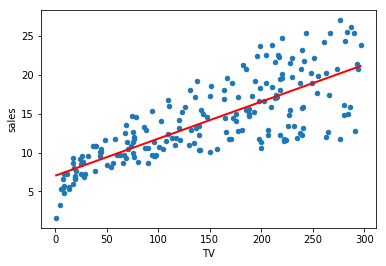

In [12]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

## How well does the model fit the data?

The most common way to evaluate the overall fit of a linear model is by the R-squared value. R-squared is the proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model. R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model.

Let's calculate the R-squared value for our simple linear model:


In [13]:
# print the R-squared value for the model
lm.rsquared

0.611875050850071

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for comparing different models.

## Question

You analysed the fit for one of the variables, can you perform the same procedure for the other two features newspaper and radio?

Tip: replace all locations with TV by newspaper or radio.

## Multiple Linear Regression in scikit-learn

Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:

y= β0 + β1 x1 + ... + βn xn

Each x represents a different feature, and each feature has its own coefficient. In this case:

y = β0 + β1 ×TV + β2 ×Radio + β3 ×Newspaper

Let's make a multiple linear regression model in scikit-learn

In [48]:
# create X and y
from sklearn.model_selection import train_test_split
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]
y = data.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [49]:
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [50]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm.coef_))

[('TV', 0.04656456787415028),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.0034504647111804347)]

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$
How do we interpret the TV coefficient (0.0466)?

For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.
Important notes:

This is a statement of association, not causation.
If an increase in TV ad spending was associated with a decrease in sales, $\beta_1$ would be negative.

In [51]:
# predict for a new observation
observation = (np.array([100, 25, 25])).reshape(1,-1)
lm.predict(observation)

array([12.09863809])

In [58]:
# calculate the R-squared
lm.score(X_test, y_test)

0.9156213613792233

## Feature selection
Which model gives us the best result, e.g. which combination of features give the best response? 

Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?

Let's remove one or more features in the feature_cols below and check the R squared!

In [65]:
# create a Python list of feature names
feature_cols = ['TV', 'radio','newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
lm.fit(X_train, y_train)

# make predictions on the testing set
y_pred = lm.predict(X_test)

# calculate the R-squared
lm.score(X_test, y_test)

0.9176214942248908